<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/MLP_Binary%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [36]:
from torchvision import datasets
import torchvision.transforms as transforms

batch_size = 20

transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

In [37]:
print(f'Train: X - {train_data.data.shape}, y - {train_data.targets.shape}')
print(f'Test: X - {test_data.data.shape}, y -{test_data.targets.shape}')

Train: X - torch.Size([60000, 28, 28]), y - torch.Size([60000])
Test: X - torch.Size([10000, 28, 28]), y -torch.Size([10000])


In [38]:
unique, counts = np.unique(train_data.targets, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


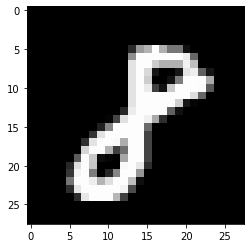



Label in Dataset: 8


In [39]:
plt.imshow(train_data.data[31], cmap = 'gray')
plt.show()
print(f"\n\nLabel in Dataset: {train_data.targets[31]}")

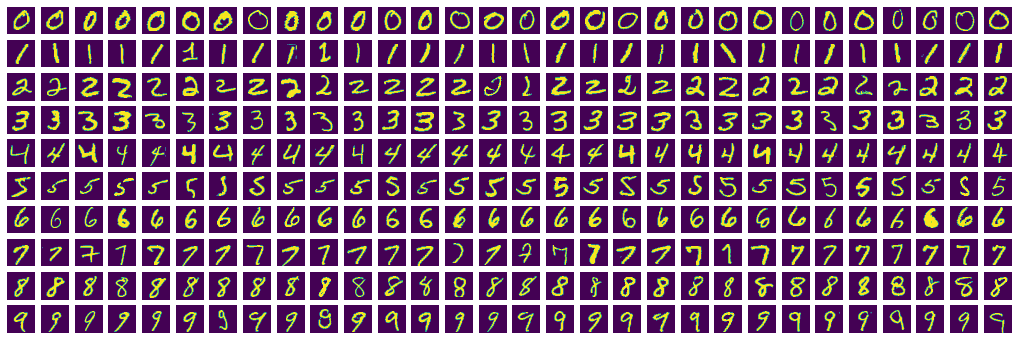

In [40]:
digits = np.unique(train_data.targets)
M = 30
dim = 28
fig, axs = plt.subplots(len(digits), M, figsize = (18, 6))

for i, d in enumerate(digits):
  for j in range(M):
    axs[i, j].imshow(train_data.data[train_data.targets == d][j].reshape(dim, dim))
    axs[i, j].axis('off')

In [41]:
train_data.data[31]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
         154, 180, 255, 176, 118, 118,  16,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [42]:
#Normalization
train_data.data = np.round(train_data.data/255, 3)
test_data.data = np.round(test_data.data/255, 3)

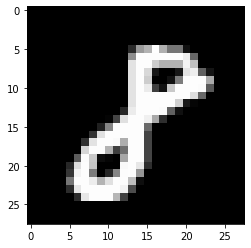

In [43]:
plt.imshow(train_data.data[31], cmap ='gray')
plt.show()

In [47]:
train_idx = np.where((train_data.targets == 0) | (train_data.targets == 6))
X_train_bin = train_data.data[train_idx]
Y_train_bin = train_data.targets[train_idx]

test_idx = np.where((test_data.targets == 0) | (test_data.targets == 6))
X_test_bin = test_data.data[test_idx]
Y_test_bin = test_data.targets[test_idx]

print(f'Train set shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Test set shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain set statistics - 0: {(Y_train_bin == 0).sum()}, 6: {(Y_train_bin == 6).sum()}')
print(f'Test set statistics - 0: {(Y_test_bin == 0).sum()}, 6: {(Y_test_bin == 6).sum()}')

Train set shapes - X: torch.Size([11841, 28, 28]), Y: torch.Size([11841])
Test set shapes - X: torch.Size([1938, 28, 28]), Y: torch.Size([1938])

Train set statistics - 0: 5923, 6: 5918
Test set statistics - 0: 980, 6: 958


In [48]:
Y_train_bin[Y_train_bin == 6] = 1
Y_test_bin[Y_test_bin == 6] = 1

In [67]:
from torch.utils.data import DataLoader, Dataset

class MNIST06_Dataset(Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, labels):
    'Initialization'
    self.labels= labels
    self.X = X

  def __len__(self):
    'Denotes the total number of samples'
    return len(self.X)

  def __getitem__(self, index):
    'Generates one sample of data'
    #Select Sample
    ID = index

    #Load data and get label
    X = self.X[ID]
    y = self.labels[ID]

    return X, y

train_data06 = MNIST06_Dataset(X_train_bin, Y_train_bin)
test_data06 = MNIST06_Dataset(X_test_bin, Y_test_bin) 

In [68]:
# Prepare data loaders

train_loader = torch.utils.data.DataLoader(dataset = train_data06, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data06, batch_size = batch_size, shuffle = False)

train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([20, 28, 28])
Labels batch shape: torch.Size([20])


In [72]:
import torch.nn as nn

## Define the MLP architecture
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 500)
    self.fc2 = nn.Linear(500, 100)
    self.fc3 = nn.Linear(100, 1)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

#Initial the MLP
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)


In [73]:
# Specify loss and optimization functions

criterion = nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [74]:
n_epochs = 500

model.train()
errors = np.zeros(n_epochs)
for epoch in range(n_epochs):
  train_loss = 0.0
  # training the model
  for data, target in train_loader:
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    target = target.to(torch.float32)
    loss = criterion(output, target)
    # backward pass : compute gradient of the loss w.r.t. model parameters
    loss.backward()
    # perform the optimization step (parameter update)
    optimizer.step()
    # update the running training loss
    train_loss += loss.item()*data.size(0)

  #print training statistics
  #calculate average loss over an epoch
  train_loss = train_loss/len(train_loader.dataset)
  errors[epoch] = train_loss
  if (epoch + 1) % 10 == 0:
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 10 	Training Loss: 0.249771
Epoch: 20 	Training Loss: 0.249657
Epoch: 30 	Training Loss: 0.249616
Epoch: 40 	Training Loss: 0.249630
Epoch: 50 	Training Loss: 0.249483
Epoch: 60 	Training Loss: 0.249482
Epoch: 70 	Training Loss: 0.249436
Epoch: 80 	Training Loss: 0.249613
Epoch: 90 	Training Loss: 0.249511
Epoch: 100 	Training Loss: 0.249538
Epoch: 110 	Training Loss: 0.249502
Epoch: 120 	Training Loss: 0.249513
Epoch: 130 	Training Loss: 0.249414
Epoch: 140 	Training Loss: 0.249420
Epoch: 150 	Training Loss: 0.249593
Epoch: 160 	Training Loss: 0.249498
Epoch: 170 	Training Loss: 0.249481
Epoch: 180 	Training Loss: 0.249385
Epoch: 190 	Training Loss: 0.249507
Epoch: 200 	Training Loss: 0.249427
Epoch: 210 	Training Loss: 0.249500
Epoch: 220 	Training Loss: 0.249516
Epoch: 230 	Training Loss: 0.249508
Epoch: 240 	Training Loss: 0.249527
Epoch: 250 	Training Loss: 0.249480
Epoch: 260 	Training Loss: 0.249383
Epoch: 270 	Training Loss: 0.249600
Epoch: 280 	Training Loss: 0.249466
E

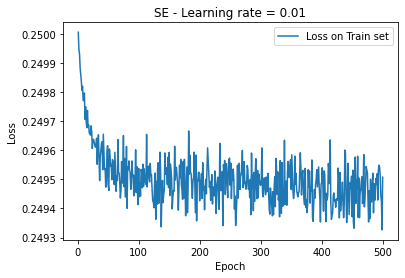

In [75]:
x = np.arange(1, len(errors)+1)
plt.plot(x, errors, label = 'Loss on Train set')
plt.legend()
plt.title('SE - Learning rate = 0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [80]:
from sklearn.metrics import accuracy_score
test_loss = 0.0
model.eval() #prep model for evaluation
correct = 0.
test_acc = []
total = 0.
for data, target in test_loader:
  # forward pass: computing predicted outputs by passing inputs to the model
  output = model(data)
  output = output.squeeze()
  #calculate the loss
  loss = criterion(output, target)
  # update test loss
  test_loss += loss.item()*data.size(0)
  # convert output probabilities to predicted class
  y_pred = np.where(output >= 0.5, 1, 0)
  test_acc.append(accuracy_score(target, y_pred))

# calculate and print avg test loss
print('Average accuracy:', np.mean(test_acc))


Average accuracy: 0.9865979381443298
